# Fractal Dimension

In [34]:
import numpy as np
import matplotlib.pyplot as plt


def LogisticMapping(x, mu):
    return 4*mu * x * (1-x)


def main(mu, epsilon_list):
    """
    Collect points about the attractor at mu
    Return the set of vectors P_{j} of bin size epsilon
    """
    x = np.random.random()
    while abs(x-0.5) <= 0.01:
        x = np.random.random()
    print(x)
        
    
    # repeat mapping until getting to the attractor
    rep = 1000
    x_list = []
    for r in range(rep):
        x = LogisticMapping(x, mu)
    
    
    # Now collect the data points near the attractor
    N_tot = 2**25
    x_list = [x]
    for n in range(N_tot):
        x = LogisticMapping(x, mu)
        x_list.append(LogisticMapping(x, mu))

    

    count_list = []
    bins_list = []
    for e in epsilon_list:
        counts, bins = np.histogram(x_list, bins=int(1/e), density=True)
        count_list.append(counts)
        bins_list.append(bins)
    return count_list, bins_list


def D_capacity(N_e, e_list):
    d_cap = []
    x_axis = []
    for i in range(len(N_e)-1):
        d_cap.append((N_e[i+1] - N_e[i]) / (e_list[i+1] - e_list[i]))
        x_axis.append((np.log(e_list[i+1]) + np.log(e_list[i])/2))
    return d_cap, x_axis

## Capacity Dimension

### For $\mu$ = 0.9, the capacity dimension

0.7344093703285312


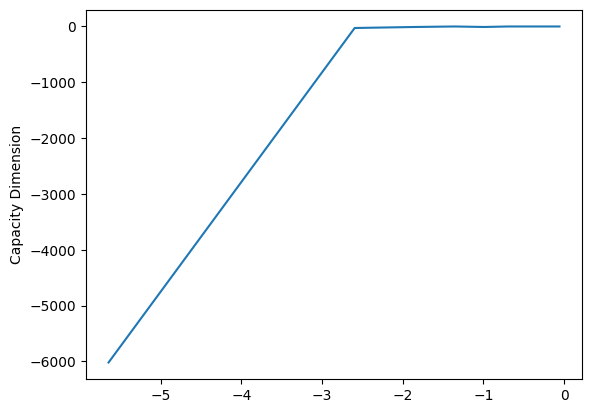

The fractal dimension for mu = 0.9 is 0.0


In [36]:
mu = 0.9
e_list = np.linspace(0.001, 1, 10)

count_list, bins_list = main(mu, e_list)

N_e = []
for l in count_list:
    n = np.count_nonzero(np.array(l))
    N_e.append(n)

d_cap, x_axis = D_capacity(N_e, e_list)

plt.plot(x_axis, d_cap)
plt.ylabel("Capacity Dimension")
plt.show()
print(f"The fractal dimension for mu = {mu} is {d_cap[-1]}")

### For $\mu$ = 0.8, the capacity dimension

0.9597504933213564


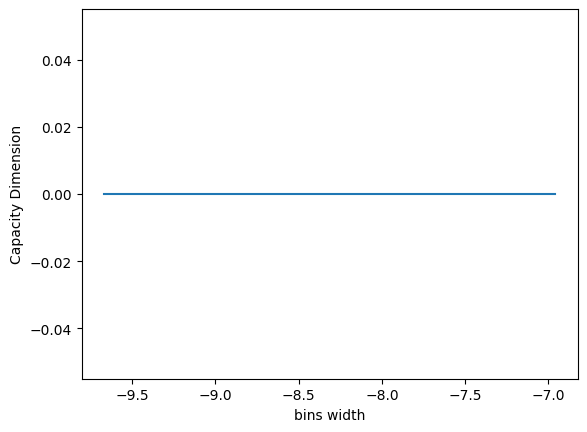

The fractal dimension for mu = 0.8 is 0.0


In [6]:
mu = 0.8
e_list = np.linspace(0.001, 0.01, 10)

count_list, bins_list = main(mu, e_list)

N_e = []
for l in count_list:
    n = np.count_nonzero(np.array(l))
    N_e.append(n)

d_cap, x_axis = D_capacity(N_e, e_list)

plt.plot(x_axis, d_cap)
plt.ylabel("Capacity Dimension")
plt.show()
print(f"The fractal dimension for mu = {mu} is {np.array(d_cap).mean()}")

## Entropy and the Information Dimension